# Игры — Анализ рекламных источников

Мы работаем в команде мобильной игры «Космические братья».

«Космические братья» — это мобильная игра, где пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. В роли аналитика проанализируйте ресурсы команды и выберете оптимальное время запуска рекламы.


 **Задача:**

Проанализируйте поведения игроков в зависимости от источника перехода.

- Проведите исследовательский анализ данных;

- Проанализируйте влияние источника перехода в игру на поведение
пользователя;

- Проверьте статистические гипотезы

 1. Проверьте гипотезу: время завершения уровня различается в
+ зависимости способа прохождения:
+ через реализацию проекта,
+ через победу над первым игроком.

2. Сформулируйте собственную статистическую гипотезу. Дополните её нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью статистического теста.

**Описание данных**

Основной датасет содержит данные о событиях, совершенных в мобильной игре
«Космические братья». В ней пользователи строят свою космическую программу и
пытаются преуспеть в нелёгком деле колонизации галактики.
Основная монетизация игры — только планируется. Но предполагается, что в
приложении будет происходить показ рекламы на экране с выбором типа объекта
для постройки.

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_cost.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение


**Инструкция по выполнению проекта**

**Шаг 1. Откройте файл с данными и изучите общую информацию**
- [ad_costs.csv](https://jupyterhub.praktikum-services.ru/user/user-0-665614037/edit/user_source.csv)
- [game_actions.csv](https://jupyterhub.praktikum-services.ru/user/user-0-665614037/edit/game_actions.csv)
- [user_source.csv](https://jupyterhub.praktikum-services.ru/user/user-0-665614037/edit/ad_costs.csv)

**Шаг 2. Подготовьте данные**
- обработка пропусков
- обработка типов данных
- обработать дубликаты

**Шаг 3. Проведите исследовательский анализ данных** 
- количество пользователей за весь период
- количество событий за весь период
- количество пользователей завершивших игру, построить график
- количество реализованных проектов
- количество постороеных зданий за весь период
- количество использованных источников трафика за весь период
- стоимость кликов для каждого источника трафика за весь пеирод
- количество пользователей пришедших с каждого источника трафика
- время прохождения уровня

**Шаг 4. Анализ влияния событий на совершение целевого события**
- Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период.
- Рассчитать Retention Rate, применяя когортный анализ. Показать изменения метрики во времени на графике. 
- Выяснить, как меняется LTV на покупателя по когортам. 
- Рассчитать средний CAC на одного пользователя для каждого источника трафика.
- Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт.  

**Шаг 5. Проверка статистических гипотез**
- Убрать редкие и выбивающиеся значения. 
- Гепотезы: 
<ol>
    <li>Влияет ли стратегия прохождения на время прохождения</li>
    <ol>
    <li>Стратегия прохождения через реализацию проекта</li>
    <li>Стратегия прохождения через победу в битве над другим игроком</li>
    </ol>
    <li>Влияет ли источник из которого пришел пользователь на его возвращение в игру(Если влияет, то можно будет увеличть бюджет на данный источник).</li>
</ol>

**Шаг 6. Формулировка выводов и рекомендации**

##  Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
from io import BytesIO
import requests
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import datetime as dt, datetime
from scipy import stats as st
import seaborn as sns
from IPython.display import display
import numpy as np
import math, cmath
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
game_actions = pd.read_csv('/datasets/game_actions.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

In [3]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [5]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


В таблицах есть пропуски.
Их необходимо заполнить

## Подготовьте данные 

### Обработка пропусков

In [6]:
game_actions['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

Можем заметить, что в данном столбце указан тип победы постройка спутника, но не указан другой тип победы. Но в данной таблице не только те кто заверщил уровень, поэтому необходимо для всех заполнить столбцы

In [7]:
game_actions.loc[game_actions['project_type'].isna() &
                 (game_actions['event'] == 'finished_stage_1'),
                 'project_type'] = 'finish_game'
game_actions.loc[game_actions['project_type'].isna(), 'project_type'] = 'not_finish_game'

In [8]:
game_actions['project_type'].unique()

array(['not_finish_game', 'finish_game', 'satellite_orbital_assembly'],
      dtype=object)

Повторояем процедуры для столбца building_type

In [9]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

В столбце есть пропуски, надо понять с чем связаны

In [10]:
game_actions[game_actions['building_type'].isna()]

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,finish_game
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,finish_game
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,finish_game
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,finish_game
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,finish_game
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,finish_game
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,finish_game
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,finish_game
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,finish_game


нет информации о постройках у пользователей, которые закончили 1 уровень победой над игроком, заполним эти пропуски

In [11]:
game_actions['building_type'] = game_actions['building_type'].fillna('no_buildings')

In [12]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   135640 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    135640 non-null  object
dtypes: object(5)
memory usage: 5.2+ MB


**Вывод по шаг 2.1:** Пропуски были в столбце project_type у пользователей которые завершили уровень победой над противником. Так же кто не завершил еще уровень. так же в таблице не отображается постройки у пользователей, которые завершили победу PvP. Пропуски заполнены

### Обработка типов данных

в в таблице ad_costs в столбце day и таблице game_actions в столбце event_datetime неправильный типа данных

In [13]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [14]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [15]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   135640 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    135640 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


**Вывод по шаг 2.2:** Типы данных исправлены

### Обработка дубликатов

In [16]:
print('Количество дублей:', game_actions.duplicated().sum())

Количество дублей: 1


In [17]:
game_actions = game_actions.drop_duplicates()
print('Количество дублей:', game_actions.duplicated().sum())

Количество дублей: 0


**Вывод по шаг 2.3:** Дубликаты были только в одной таблице, их удалили

**Вывод по шаг 2:**
- Пропуски были в столбце project_type у пользователей которые завершили уровень победой над противником. Так же кто не завершил еще уровень. так же в таблице не отображается постройки у пользователей, которые завершили победу PvP. Пропуски заполнены
- В таблице ad_costs в столбце day и таблице game_actions в столбце event_datetime неправильный типа данных
- Дубликаты были только в одной таблице, их удалили

## Проведите исследовательский анализ

### Количество пользователей за весь период

In [18]:
print('Количество уникальных пользователей за весь период:'
      ,game_actions['user_id'].nunique())
print('Количество событий за весь период:'
      ,game_actions.groupby('event').agg({'building_type':'count'}).reset_index().rename(columns={'building_type':'count'}))

Количество уникальных пользователей за весь период: 13576
Количество событий за весь период:               event   count
0          building  127956
1  finished_stage_1    5817
2           project    1866


### Количество пользователей завершивших игру

In [19]:
event = game_actions.groupby(['event']).agg({'user_id':'nunique'})
finish_game = event.loc['finished_stage_1', 'user_id']
users_game = pd.DataFrame({'users': ['finish', 'not_finish', 'total'],
                           'count': [finish_game,
                                     game_actions['user_id'].nunique() - finish_game,
                                     game_actions['user_id'].nunique()]})
users_game

,users,count
0,finish,5817
1,not_finish,7759
2,total,13576


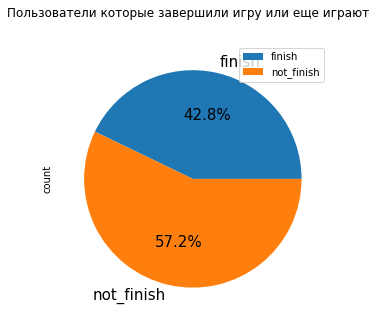

In [20]:
users_game.iloc[:2].set_index('users').plot.pie(autopct="%.1f%%", subplots = True, figsize=(5, 5),
                                                title='Пользователи которые завершили игру или еще играют', fontsize=15)
plt.show()

По графику видно что больше половину пользователей не закончило игру

### Количество реализованных проектов

In [21]:
projects = (game_actions[game_actions['event'] != 'building']
            .groupby('event')
            .agg({'user_id':'count'})
            .reset_index()
            .rename(columns={'user_id':'count'}))
projects

,event,count
0,finished_stage_1,5817
1,project,1866


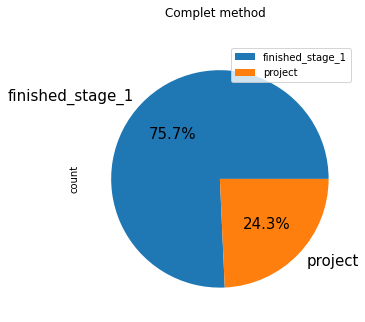

In [22]:
projects.set_index('event').plot.pie(autopct="%.1f%%", subplots = True, figsize=(5,5), title='Complet method', fontsize=15)
plt.show()

- завершили уровент путем постройки 1866 человек 
- завершили уровень путем PvP 5817 человек 

### Количество построенных зданий за весь период

In [23]:
print('Количество объектов за весь период:', game_actions[game_actions['building_type'] != 'no_buildings']['building_type'].count())

Количество объектов за весь период: 127956


### Стоимость кликов 

In [24]:
adv_total = (ad_costs
             .groupby('source')
             .agg({'cost':'sum',})        
             )
adv_total.sort_values(by=['cost'], ascending=False).round(2)

,cost
source,
yandex_direct,2233.11
instagram_new_adverts,2161.44
facebook_ads,2140.90
youtube_channel_reklama,1068.12


Самый дорогой источник по стоимости кликов yandex_direct, самый дешевый youtube_channel_reklama	

### Количество пользователей с источника

In [25]:
user_total = (user_source
              .groupby('source')
              .agg({'user_id':'nunique'})
              .rename(columns={'user_id':'users'}))
user_total.sort_values(by=['users'], ascending=False)     

,users
source,
yandex_direct,4817
instagram_new_adverts,3347
facebook_ads,2726
youtube_channel_reklama,2686


Больше всего пользоватлей пришло через yandex_direct, отсюда и таки больие затраты на рекоамный источник

### Время прохождение первого уровня

Необходимо составить таблицу с теми кто прошел первый уровень

In [26]:
game_source=game_actions.merge(user_source, on='user_id')
game_source

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,youtube_channel_reklama
...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,not_finish_game,facebook_ads
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,not_finish_game,facebook_ads
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,not_finish_game,youtube_channel_reklama
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,not_finish_game,youtube_channel_reklama


In [27]:
user_final=game_actions[game_actions['project_type']!='not_finish_game']['user_id']

level_time = (game_source
              .query('user_id in @user_final')
              .groupby(['user_id','source'])
              .agg({'event_datetime':['min','max']}))
level_time['level_time'] = level_time[('event_datetime', 'max')] - level_time[('event_datetime', 'min')]
level_time.columns = level_time.columns.droplevel(1)
level_time = level_time.reset_index().sort_values(by='level_time')
level_time

,user_id,source,event_datetime,event_datetime,level_time
91,03990bc0-47b6-44ce-9f8b-3afb1a97d0e7,instagram_new_adverts,2020-05-07 16:40:32,2020-05-08 02:19:33,0 days 09:39:01
4687,ced7b368-818f-48f6-9461-2346de0892c5,instagram_new_adverts,2020-05-04 00:13:21,2020-05-04 19:47:29,0 days 19:34:08
4547,c8180f71-68dc-4fd5-ba6e-ba5f5d0d28f7,youtube_channel_reklama,2020-05-08 16:08:29,2020-05-09 11:52:33,0 days 19:44:04
825,2204ae7f-892b-494d-bd58-28816ff35eb5,yandex_direct,2020-05-07 02:25:27,2020-05-08 01:02:51,0 days 22:37:24
1032,2ab1cc5a-413a-408e-ba76-01de8e12bead,youtube_channel_reklama,2020-05-05 13:25:04,2020-05-06 13:43:12,1 days 00:18:08
...,...,...,...,...,...
1205,32572adb-900f-4b5d-a453-1eb1e6d88d8b,facebook_ads,2020-05-07 05:43:45,2020-06-05 12:12:27,29 days 06:28:42
3753,a4f54b34-299f-495f-b29f-745465741366,facebook_ads,2020-05-04 05:00:48,2020-06-03 12:47:09,30 days 07:46:21
5497,f21d179f-1c4b-437e-b9c6-ab1976907195,instagram_new_adverts,2020-05-06 02:56:25,2020-06-05 12:32:49,30 days 09:36:24
843,22cce310-fe10-41a2-941b-9c3d63327fea,yandex_direct,2020-05-04 18:38:25,2020-06-04 15:50:38,30 days 21:12:13


In [28]:
user_inst=level_time[level_time['source']=='instagram_new_adverts']


In [29]:
print('Самое долгое прохождение игроков пришедших через instagram_new_adverts:',user_inst['level_time'].max())
print('Самое быстрое прохождение игроков пришедших через instagram_new_adverts:',user_inst['level_time'].min())
print('Среднее время прохождение игроков пришедших через instagram_new_adverts:',user_inst['level_time'].mean())
print('Медианное время прохождение игроков пришедших через instagram_new_adverts:',user_inst['level_time'].median())

Самое долгое прохождение игроков пришедших через instagram_new_adverts: 30 days 09:36:24
Самое быстрое прохождение игроков пришедших через instagram_new_adverts: 0 days 09:39:01
Среднее время прохождение игроков пришедших через instagram_new_adverts: 11 days 21:28:48.419508867
Медианное время прохождение игроков пришедших через instagram_new_adverts: 11 days 14:23:12


In [30]:
user_ya=level_time[level_time['source']=='yandex_direct']
print('Самое долгое прохождение игроков пришедших через yandex_direct:',user_ya['level_time'].max())
print('Самое быстрое прохождение игроков пришедших через yandex_direct:',user_ya['level_time'].min())
print('Среднее время прохождение игроков пришедших через yandex_direct:',user_ya['level_time'].mean())
print('Медианное время прохождение игроков пришедших через yandex_direct:',user_ya['level_time'].median())

Самое долгое прохождение игроков пришедших через yandex_direct: 30 days 21:58:53
Самое быстрое прохождение игроков пришедших через yandex_direct: 0 days 22:37:24
Среднее время прохождение игроков пришедших через yandex_direct: 11 days 19:24:02.402546523
Медианное время прохождение игроков пришедших через yandex_direct: 11 days 12:16:03


In [31]:
user_fb=level_time[level_time['source']=='facebook_ads']
print('Самое долгое прохождение игроков пришедших через facebook_ads:',user_fb['level_time'].max())
print('Самое быстрое прохождение игроков пришедших через facebook_ads:',user_fb['level_time'].min())
print('Среднее время прохождение игроков пришедших через facebook_ads:',user_fb['level_time'].mean())
print('Медианное время прохождение игроков пришедших через facebook_ads:',user_fb['level_time'].median())

Самое долгое прохождение игроков пришедших через facebook_ads: 30 days 07:46:21
Самое быстрое прохождение игроков пришедших через facebook_ads: 1 days 10:38:42
Среднее время прохождение игроков пришедших через facebook_ads: 11 days 20:35:33.946086956
Медианное время прохождение игроков пришедших через facebook_ads: 11 days 14:00:43


In [32]:
user_yt=level_time[level_time['source']=='youtube_channel_reklama']
print('Самое долгое прохождение игроков пришедших через youtube_channel_reklama:',user_yt['level_time'].max())
print('Самое быстрое прохождение игроков пришедших через youtube_channel_reklama:',user_yt['level_time'].min())
print('Среднее время прохождение игроков пришедших через youtube_channel_reklama:',user_yt['level_time'].mean())
print('Медианное время прохождение игроков пришедших через youtube_channel_reklama:',user_yt['level_time'].median())

Самое долгое прохождение игроков пришедших через youtube_channel_reklama: 27 days 01:27:24
Самое быстрое прохождение игроков пришедших через youtube_channel_reklama: 0 days 19:44:04
Среднее время прохождение игроков пришедших через youtube_channel_reklama: 11 days 21:46:25.266609145
Медианное время прохождение игроков пришедших через youtube_channel_reklama: 11 days 14:27:29


**Выводы по 3 шагу:** 
- Из всех пользователей закончили уровень только 42,8%
- 75,5% пользователей закончили уроветь через PvP
- Самый дорогой по привлечению но больше всего пришло игроков через yandex_direct
- меньше всего было затрачено на youtube_channel_reklama но и через него пришло меньше всего по общему количеству
- Вовлеченность игроков, которые прошли первый уровень, по источникам примерно одинаковая, среднее и медианное значение 11 дней.


## Анализ влияния событий на совершение целевого события

### Рассчитать DAU, WAU.

In [34]:
game_actions['session_week']  = game_actions['event_datetime'].dt.week
game_actions['session_date'] = game_actions['event_datetime'].dt.date
dau = game_actions.groupby('session_date').agg({'user_id': 'nunique'}).mean()
wau = game_actions.groupby('session_week').agg({'user_id': 'nunique'}).mean()
print('DAU - ',dau[0].round(2))
print('WAU - ',wau[0].round(2))  
game_actions.head(3)

DAU -  2884.88
WAU -  6120.0


,event_datetime,event,building_type,user_id,project_type,session_week,session_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,19,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_finish_game,19,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_finish_game,19,2020-05-04


In [35]:
game_actions['start_date'] = game_actions['event_datetime'].dt.date
#game_actions['end_date'] = game_actions['end_time'].dt.date
game_actions['start_week'] =  game_actions['event_datetime'].dt.week
#visits['end_date'] = pd.to_datetime(visits['end_date'])
#game_actions['start_date'] = pd.game_actions(game_actions['start_date'])
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,session_week,session_date,start_date,start_week
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,not_finish_game,19,2020-05-04,2020-05-04,19
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,not_finish_game,19,2020-05-04,2020-05-04,19
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,not_finish_game,19,2020-05-04,2020-05-04,19


In [36]:
dau_total = game_actions.groupby('start_date').agg({'user_id': 'nunique'})
wau_total = (
    game_actions.groupby(['start_week'])
    .agg({'user_id': 'nunique'})
    
)
print('Пользователей в день в среднем:', int(dau_total.mean()))
print('Пользователей в неделю в среднем:', int(wau_total.mean()))

Пользователей в день в среднем: 2884
Пользователей в неделю в среднем: 6120


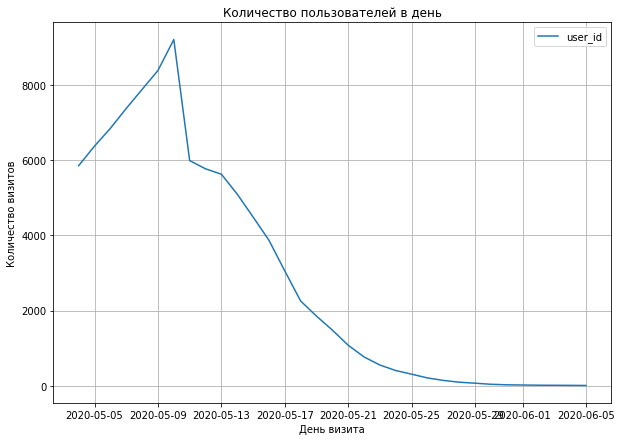

In [37]:
dau_total.plot(kind = 'line', 
                grid=True, 
                figsize=(10, 7))
plt.title('Количество пользователей в день')
plt.xlabel('День визита')
plt.ylabel('Количество визитов')
plt.show()

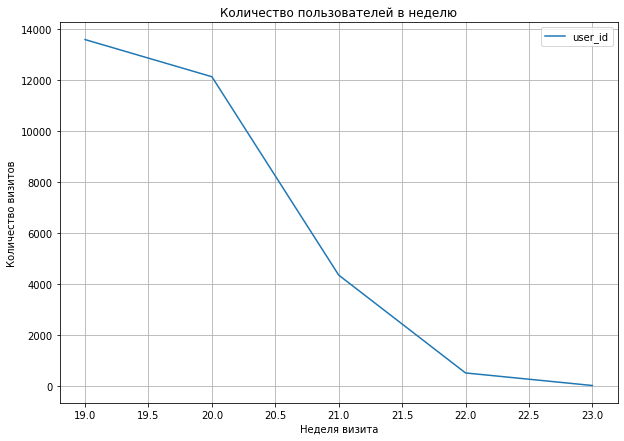

In [38]:
wau_total.plot(kind = 'line', 
                grid=True, 
                figsize=(10, 7))
plt.title('Количество пользователей в неделю')
plt.xlabel('Неделя визита')
plt.ylabel('Количество визитов')
plt.show()

- Вычислив данные показатели мы можем сказать, что еженевно в игру заходит 2884.88 пользователя, а в еженедельно 6120.0
- По графику видно, что пик пользователей был 10 мая

In [39]:
### Рассчитать Retention Rate, применяя когортный анализ. Показать изменения метрики во времени на графике.

In [40]:
##user_activity = game_actions[['user_id', 'session_date']].rename(columns={'session_date':'activity_date'}).copy()
#first_activity_date = user_activity.groupby(['user_id'])['activity_date'].min()
#first_activity_date.name = 'first_activity_date'
#user_activity = user_activity.join(first_activity_date, on='user_id')
#user_activity['activity_date'] = pd.to_datetime(user_activity['activity_date'])
#user_activity['first_activity_date'] = pd.to_datetime(user_activity['first_activity_date'])
#user_activity['cohort_lifetime'] = user_activity['activity_date'] - user_activity['first_activity_date']
#user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1, 'D')
#user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int')
#cohorts = user_activity.groupby(['first_activity_date','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
#initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_date', 'user_id']]
#initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 
#cohorts = cohorts.merge(initial_users_count,on='first_activity_date') 
#cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users'] 
#cohorts['first_activity_date'] = cohorts['first_activity_date'].dt.strftime('%Y-%m-%d')
#retention_pivot = cohorts.pivot_table(
#    index='first_activity_date',
#    columns='cohort_lifetime',
#    values='retention',
#    aggfunc='sum',
#) 
#plt.figure(figsize=(40, 5))
#plt.title('Retention Rate', size=20)
#ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cbar=0, square=True)
#plt.xlabel('Cohort lifetime', size=15)
#plt.ylabel('Cohort', size=15)
#plt.show()

### Выяснить, как меняется LTV на покупателя по когортам.

In [41]:
def add_cost(data):
    if data == 'building':
        return .05
    else:
        return 0


game_actions['revenue'] = game_actions['event'].apply(add_cost)
game_actions = pd.merge(game_actions, user_source, on='user_id')
orders = game_actions[['source', 'user_id', 'event_datetime', 'revenue']].copy()
orders = orders[orders['revenue'] > 0]
orders['order_day'] = orders['event_datetime'].astype('datetime64[D]')
orders = orders.rename(columns={'user_id':'uid'})
orders.head()

,source,uid,event_datetime,revenue,order_day
0,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,0.05,2020-05-04
1,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 05:20:15,0.05,2020-05-05
2,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 19:24:02,0.05,2020-05-05
3,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 20:59:19,0.05,2020-05-05
4,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-06 00:52:56,0.05,2020-05-06


In [42]:
first_orders = orders.groupby(['source', 'uid']).agg({'order_day': 'min'}).reset_index()
first_orders.columns = ['source', 'uid', 'first_order_day']
first_orders.head()

,source,uid,first_order_day
0,facebook_ads,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
1,facebook_ads,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05
2,facebook_ads,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04
3,facebook_ads,00440efd-aa50-4b4b-aae8-ffcd1782729d,2020-05-04
4,facebook_ads,00965328-5e54-453f-b11b-52f8ae9ae80b,2020-05-07


In [43]:
cohort_sizes = (
    first_orders.groupby(['source', 'first_order_day'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['source', 'first_order_day', 'n_buyers']
cohort_sizes.head()

,source,first_order_day,n_buyers
0,facebook_ads,2020-05-04,1184
1,facebook_ads,2020-05-05,694
2,facebook_ads,2020-05-06,345
3,facebook_ads,2020-05-07,224
4,facebook_ads,2020-05-08,139


In [44]:
orders_new = pd.merge(orders,first_orders, on=['uid', 'source'])
orders_new.head()

,source,uid,event_datetime,revenue,order_day,first_order_day
0,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-04 00:00:01,0.05,2020-05-04,2020-05-04
1,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 05:20:15,0.05,2020-05-05,2020-05-04
2,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 19:24:02,0.05,2020-05-05,2020-05-04
3,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-05 20:59:19,0.05,2020-05-05,2020-05-04
4,youtube_channel_reklama,55e92310-cb8e-4754-b622-597e124b03de,2020-05-06 00:52:56,0.05,2020-05-06,2020-05-04


In [45]:
cohorts = (
    orders_new.groupby(['source', 'first_order_day', 'order_day'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on=['source', 'first_order_day'])
report.head()

,source,first_order_day,n_buyers,order_day,revenue
0,facebook_ads,2020-05-04,1184,2020-05-04,82.85
1,facebook_ads,2020-05-04,1184,2020-05-05,43.65
2,facebook_ads,2020-05-04,1184,2020-05-06,49.55
3,facebook_ads,2020-05-04,1184,2020-05-07,51.60
4,facebook_ads,2020-05-04,1184,2020-05-08,59.40


In [46]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_day'] - report['first_order_day']
) / np.timedelta64(1, 'D')
report['age'] = report['age'].round().astype('int')
report.head()

,source,first_order_day,n_buyers,order_day,revenue,gp,age
0,facebook_ads,2020-05-04,1184,2020-05-04,82.85,82.85,0
1,facebook_ads,2020-05-04,1184,2020-05-05,43.65,43.65,1
2,facebook_ads,2020-05-04,1184,2020-05-06,49.55,49.55,2
3,facebook_ads,2020-05-04,1184,2020-05-07,51.60,51.60,3
4,facebook_ads,2020-05-04,1184,2020-05-08,59.40,59.40,4


LTV по всем источникам


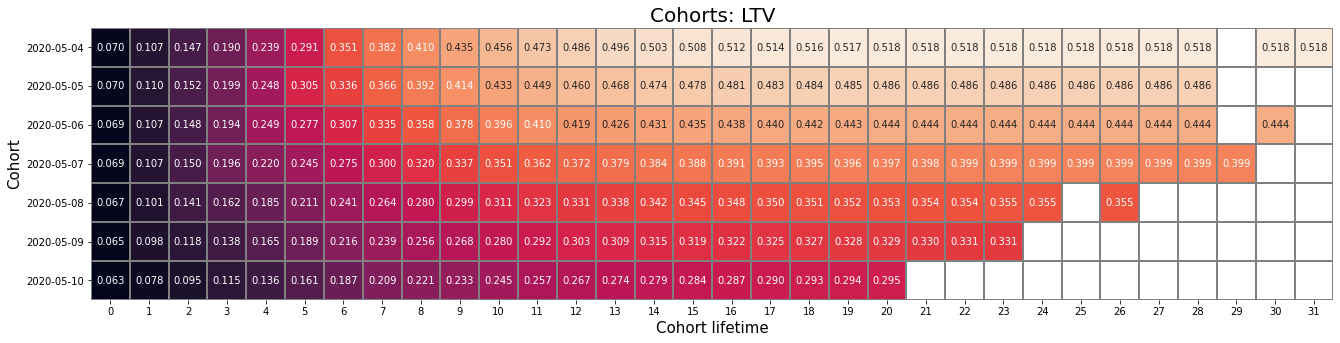

In [47]:
report['ltv'] = report['gp'] / report['n_buyers']

report['first_order_day'] = report['first_order_day'].dt.strftime('%Y-%m-%d')
# визуализируем когорты в виде сводной таблицы
output = report.pivot_table(
    index='first_order_day', columns='age', values='ltv', aggfunc='mean'
).round(3)
# выводим сводную таблицу ввиде тепловой карты
print('\033[1m' + 'LTV по всем источникам' + '\033[0m')
plt.figure(figsize=(30, 5))
plt.title('Cohorts: LTV', size=20)
ax = sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.3f', linewidths=1, linecolor='gray', cbar=0, square=True)
plt.xlabel('Cohort lifetime', size=15)
plt.ylabel('Cohort', size=15)
plt.show()

LTV растет до 19 после рост останавливается, возможно это связано с тем что на прохождение первого уровня необходимо в среднем 11 дней, что очень долго.

### Рассчитать средний CAC на одного пользователя для каждого источника трафика.

In [48]:
week_costs = ad_costs.groupby(['source', 'day']).sum().reset_index().set_index('day')
week_costs.head()

,source,cost
day,,
2020-05-03,facebook_ads,935.882786
2020-05-04,facebook_ads,548.354480
2020-05-05,facebook_ads,260.185754
2020-05-06,facebook_ads,177.982200
2020-05-07,facebook_ads,111.766796


In [49]:
week_costs = week_costs.reset_index()
week_costs['day'] = week_costs['day'].dt.strftime('%Y-%m-%d')
week_costs = week_costs.set_index('day')
# добавим данные о расходах в отчёт и посчитаем CAC
report_new = pd.merge(
    report, week_costs, left_on=['source', 'first_order_day'], right_on=['source', 'day']
)
report_new['cac'] = report_new['cost'] / report_new['n_buyers']
report_new.head() 

,source,first_order_day,n_buyers,order_day,revenue,gp,age,ltv,cost,cac
0,facebook_ads,2020-05-04,1184,2020-05-04,82.85,82.85,0,0.069975,548.35448,0.463137
1,facebook_ads,2020-05-04,1184,2020-05-05,43.65,43.65,1,0.036867,548.35448,0.463137
2,facebook_ads,2020-05-04,1184,2020-05-06,49.55,49.55,2,0.041850,548.35448,0.463137
3,facebook_ads,2020-05-04,1184,2020-05-07,51.60,51.60,3,0.043581,548.35448,0.463137
4,facebook_ads,2020-05-04,1184,2020-05-08,59.40,59.40,4,0.050169,548.35448,0.463137


In [50]:
cost_by_source = ad_costs.groupby('source').agg({'cost':'sum'})
# посчитаем количество покупателей (buyers) за весь пеирод
buyers_by_source = (
    first_orders.groupby('source')
    .agg({'uid': 'nunique'})
    .reset_index()
)
buyers_by_source.columns = ['source', 'buyers']
buyers_by_source.head()

,source,buyers
0,facebook_ads,2726
1,instagram_new_adverts,3347
2,yandex_direct,4817
3,youtube_channel_reklama,2686


In [51]:
cac = pd.merge(
    cost_by_source, buyers_by_source, on='source')
cac['cac'] = cac['cost'] / cac['buyers']
cac

,source,cost,buyers,cac
0,facebook_ads,2140.904643,2726,0.785365
1,instagram_new_adverts,2161.441691,3347,0.645785
2,yandex_direct,2233.111449,4817,0.463590
3,youtube_channel_reklama,1068.119204,2686,0.397662


<p>Наибольшая стоимость привлечения клиента у facebook_ads - 0.78
<p>Наименьшая стоимость привлечения клиента у youtube_channel_reklama - 0.39
<p>Самый выгодный источник для привлечения yandex_direct

### Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт.

In [52]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [53]:
def heatmap_romi(data, source):
    # визуализируем когорты в виде сводной таблицы
    output = data.pivot_table(
        index='first_order_day', columns='age', values='romi', aggfunc='mean'
    )    
    
    # выводим сводную таблицу ввиде тепловой карты
    print('\033[1m' + source + '\033[0m')
    plt.figure(figsize=(30, 5))
    plt.title('Cohorts: ROMI', size=20)
    ax = sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.3f', linewidths=1, linecolor='gray', cbar=0, square=True)
    plt.xlabel('Cohort lifetime', size=15)
    plt.ylabel('Cohort', size=15)
    plt.show()
    
    print(output.cumsum(axis=1).mean(axis=0), '\n')

По всем источникам


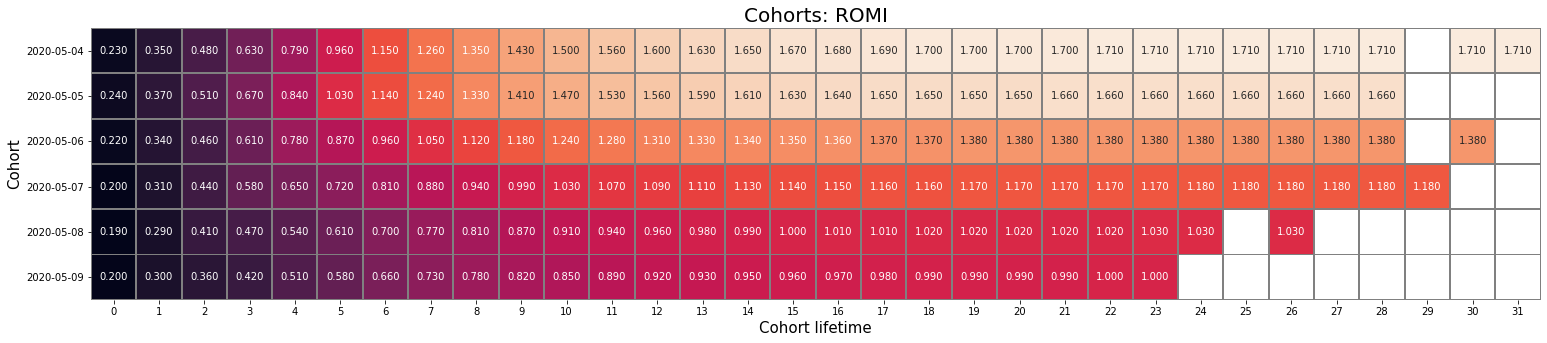

age
0     0.213807
1     0.328377
2     0.445150
3     0.563144
4     0.683254
5     0.795031
6     0.903720
7     0.987091
8     1.055842
9     1.115695
10    1.166072
11    1.208339
12    1.240775
13    1.263237
14    1.280321
15    1.292688
16    1.301919
17    1.308777
18    1.313819
19    1.317288
20    1.319587
21    1.321405
22    1.322580
23    1.323937
24    1.389972
25    1.480957
26    1.390954
27    1.481777
28    1.482078
29    1.179500
30    1.545522
31    1.707902
dtype: float64 

facebook_ads


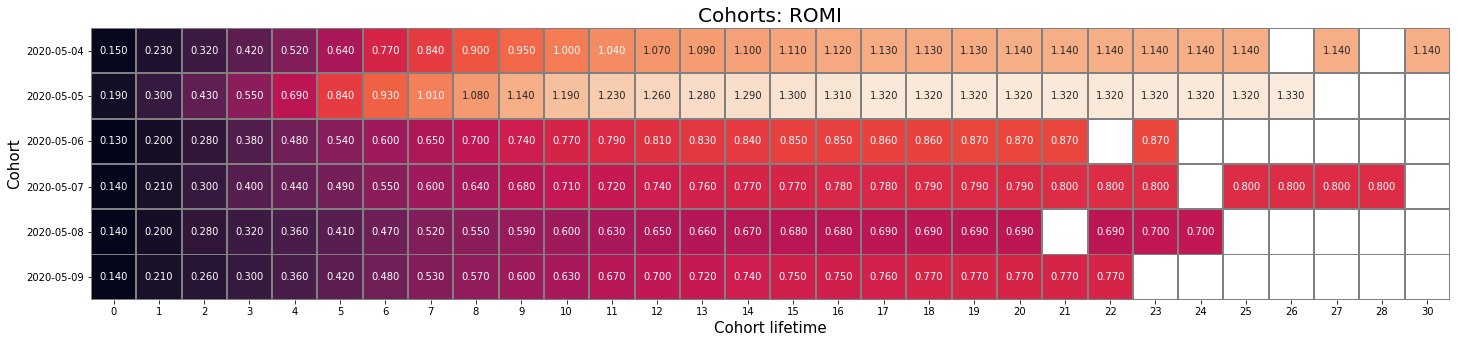

age
0     0.148685
1     0.226742
2     0.312944
3     0.394689
4     0.476342
5     0.556420
6     0.633738
7     0.692541
8     0.740086
9     0.781960
10    0.816545
11    0.847888
12    0.871919
13    0.888397
14    0.900963
15    0.909014
16    0.916676
17    0.922097
18    0.926148
19    0.928002
20    0.930037
21    0.978995
22    0.945329
23    0.964748
24    1.053569
25    1.087319
26    1.061776
27    0.969284
28    0.800327
30    1.139227
dtype: float64 

instagram_new_adverts


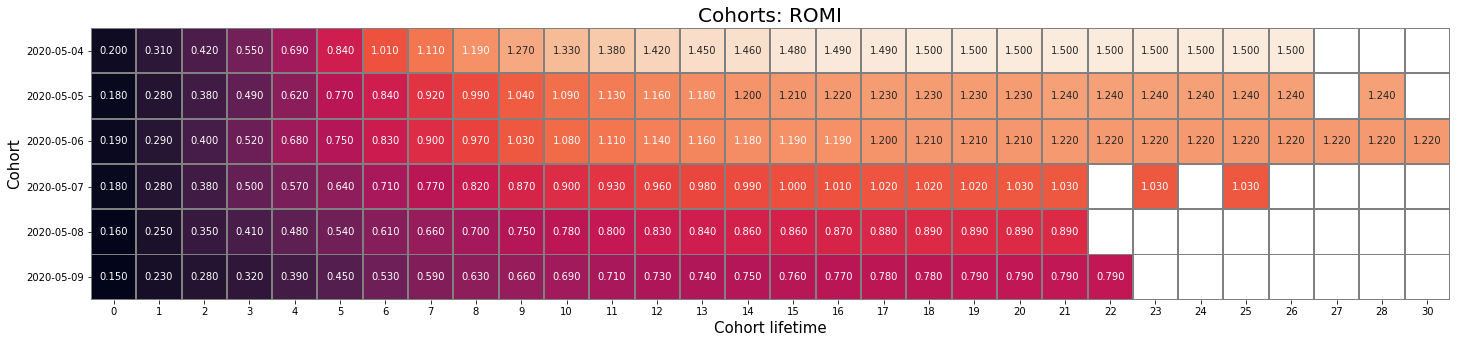

age
0     0.175696
1     0.273273
2     0.368544
3     0.466727
4     0.569732
5     0.662557
6     0.756050
7     0.826318
8     0.883473
9     0.934342
10    0.976126
11    1.011761
12    1.039785
13    1.059010
14    1.073924
15    1.083816
16    1.092893
17    1.099592
18    1.103702
19    1.106913
20    1.109093
21    1.110202
22    1.186333
23    1.246441
24    1.320268
25    1.247241
26    1.320819
27    1.218863
28    1.229538
30    1.219441
dtype: float64 

yandex_direct


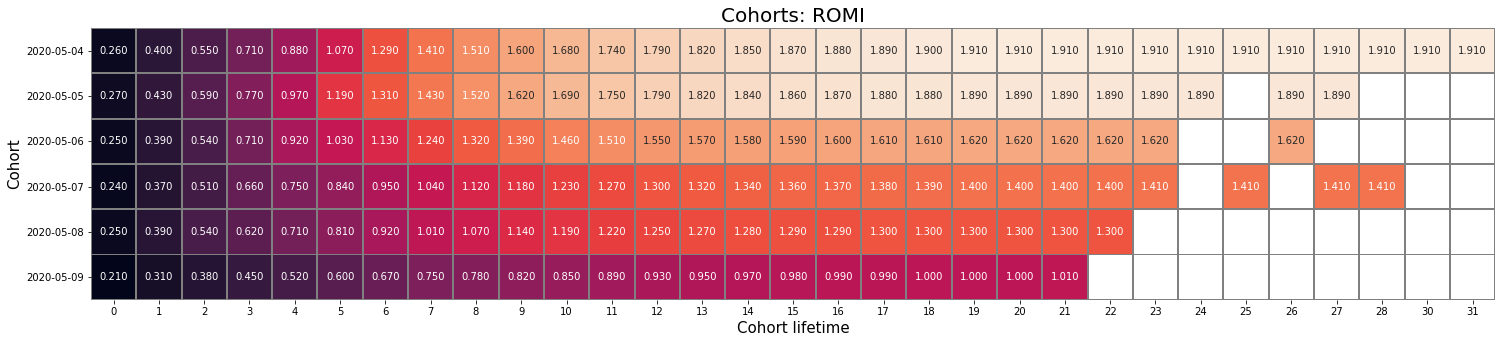

age
0     0.249800
1     0.382550
2     0.519480
3     0.655851
4     0.792275
5     0.923261
6     1.046577
7     1.146453
8     1.220856
9     1.289569
10    1.349008
11    1.397296
12    1.433763
13    1.458748
14    1.477417
15    1.491806
16    1.500981
17    1.508897
18    1.514041
19    1.517868
20    1.520122
21    1.521388
22    1.625851
23    1.707048
24    1.902377
25    1.659736
26    1.808358
27    1.737478
28    1.660443
30    1.913995
31    1.914085
dtype: float64 

youtube_channel_reklama


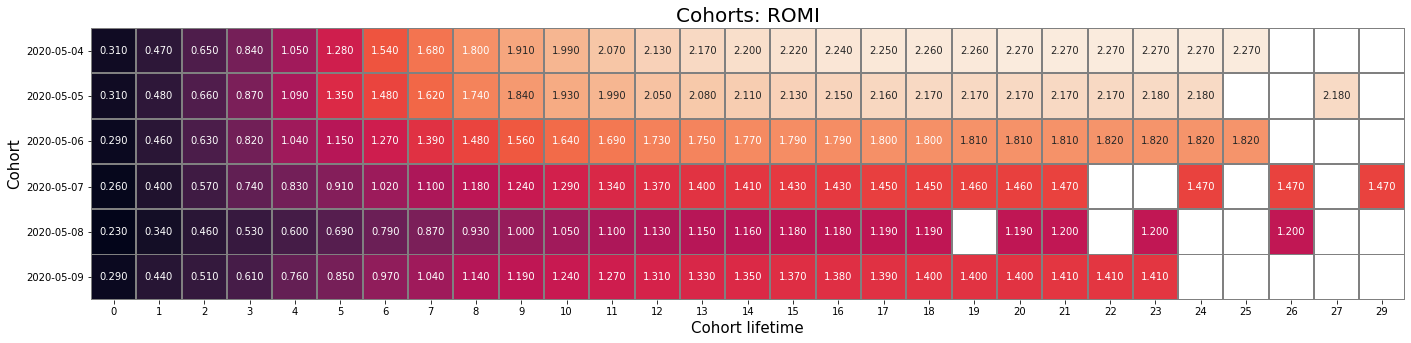

age
0     0.281047
1     0.430941
2     0.579634
3     0.735310
4     0.894666
5     1.037888
6     1.178514
7     1.283052
8     1.378955
9     1.456910
10    1.522610
11    1.576410
12    1.617631
13    1.646791
14    1.668980
15    1.686116
16    1.697126
17    1.704522
18    1.711387
19    1.820786
20    1.718758
21    1.721919
22    1.917840
23    1.776045
24    1.932946
25    2.045046
26    1.336099
27    2.176933
29    1.468408
dtype: float64 



In [54]:
# рассчитаем ROMI
heatmap_romi(report_new, 'По всем источникам') 

for source in report_new['source'].unique().tolist():
    heatmap_romi(report_new[report_new['source'] == source], source) 

**Вывод по 4 шагу:**<p>Пользователей в день в среднем: 2884
<p>Пользователей в неделю в среднем: 6120
<p>LTV растет до 19 после рост останавливается, возможно это связано с тем что на прохождение первого уровня необходимо в среднем 11 дней, что очень долго.

- Наибольшая стоимость привлечения клиента у facebook_ads - 0.78
- Наименьшая стоимость привлечения клиента у youtube_channel_reklama - 0.39
- Самый выгодный источник для привлечения yandex_direct
    
Быстрее всего окупится youtube_channel_reklama за 6 месяцев, самое долгое время окупаемости facebook_ads

## Проверка статистических гипотез

### Убрать редкие и выбивающиеся значения.

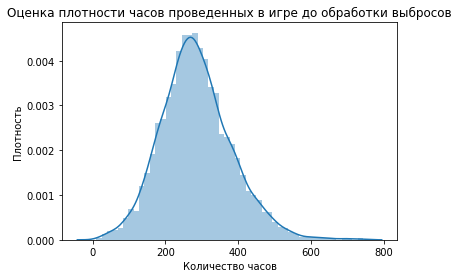

In [55]:
level_time_finish = level_time.copy()
level_time_finish['level_time_h'] = level_time['level_time'] / np.timedelta64(1, 'h')
sns.distplot(level_time_finish['level_time_h'])
plt.title('Оценка плотности часов проведенных в игре до обработки выбросов')
plt.xlabel('Количество часов')
plt.ylabel('Плотность')
plt.show()

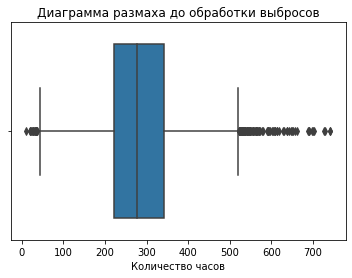

In [56]:
sns.boxplot(level_time_finish['level_time_h']);
plt.title('Диаграмма размаха до обработки выбросов')
plt.xlabel('Количество часов')
#plt.ylabel("Ось Y")
plt.show()

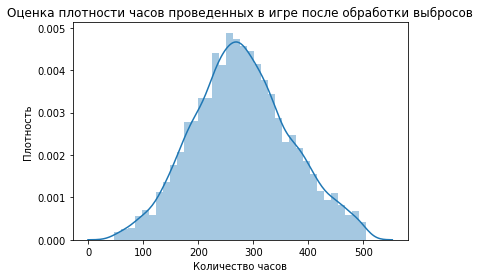

In [57]:
level_time_finish = level_time_finish[level_time_finish['level_time_h'] < level_time_finish['level_time_h'].quantile(0.98)]
level_time_finish = level_time_finish[level_time_finish['level_time_h'] > level_time_finish['level_time_h'].quantile(0.004)]
sns.distplot(level_time_finish['level_time_h'])
plt.title('Оценка плотности часов проведенных в игре после обработки выбросов')
plt.xlabel('Количество часов')
plt.ylabel('Плотность')
plt.show()

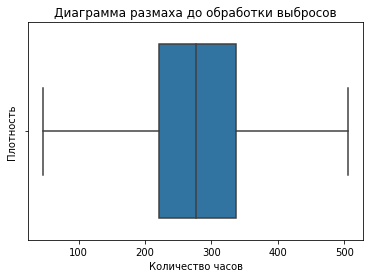

In [58]:
sns.boxplot(level_time_finish['level_time_h'])
plt.title('Диаграмма размаха до обработки выбросов')
plt.xlabel('Количество часов')
plt.ylabel('Плотность')
plt.show()

Выбросы обработаны

### Гепотезы

#### Влияет ли стратегия прохождения на время прохождения
<p>Н0: Влияет ли стратегия прохождения на время прохождения
<p>Н1: Стратегия прохождения не влияет на время прохождения
    
- Стратегия прохождения через реализацию проекта
- Стратегия прохождения через победу в битве над другим игроком

In [59]:
user_finish = game_actions[(game_actions['project_type'] != 'not_finish_game')][['user_id', 'project_type']]
user_project = game_actions[game_actions['project_type'] == 'satellite_orbital_assembly'][['user_id', 'project_type']]
user_fight = user_finish[~user_finish.isin(user_project['user_id'].unique())].dropna()
level_passing_time_project = level_time_finish[['user_id', 'level_time_h']].merge(user_project, how='left', on='user_id').dropna()
level_passing_time_user_fight = level_time_finish[['user_id', 'level_time_h']].merge(user_fight, how='left', on='user_id').dropna()
victory_over_enemy = level_passing_time_user_fight['level_time_h']
satellite_orbital_assembly = level_passing_time_project['level_time_h']

alpha = .05

results = st.ttest_ind(
    satellite_orbital_assembly, 
    victory_over_enemy)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.7618154591760238e-101
Отвергаем нулевую гипотезу


In [60]:
#df=pd.concat([level_passing_time_project, level_passing_time_user_fight], axis=0 )

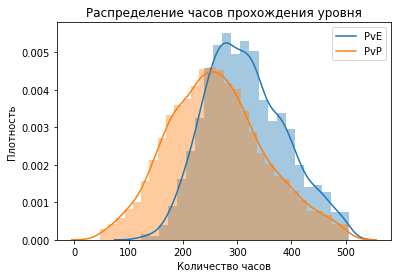

In [61]:
sns.distplot(level_passing_time_project['level_time_h']);
sns.distplot(level_passing_time_user_fight['level_time_h']);
plt.title('Распределение часов прохождения уровня')
plt.xlabel('Количество часов')
plt.ylabel('Плотность')
plt.legend(['PvE', 'PvP'])
plt.show()

Время прохождения уровня не зависит от выбора стратегии 

#### Влияет ли источник из которого пришел пользователь на его возвращение в игру (Если влияет, то можно будет увеличть бюджет на данный источник).

<p>H0: Возврат игроков в игру не зависит от источника трафика
<p>H1: Возврат игроков в игру зависит от источника трафика

In [62]:
alpha_2 = .05 / 6

In [63]:
instagram_new_adverts = game_actions[game_actions['source'] == 'instagram_new_adverts'].groupby('user_id').agg({'session_date':'nunique'})['session_date']
facebook_ads = game_actions[game_actions['source'] == 'facebook_ads'].groupby('user_id').agg({'session_date':'nunique'})['session_date']
youtube_channel_reklama = game_actions[game_actions['source'] == 'youtube_channel_reklama'].groupby('user_id').agg({'session_date':'nunique'})['session_date']
yandex_direct = game_actions[game_actions['source'] == 'yandex_direct'].groupby('user_id').agg({'session_date':'nunique'})['session_date']

In [64]:
def statistical_significance(H0, H1, title,t1,t2):
    print('\033[1m' + title + '\033[0m' + '\n')
    sns.kdeplot(H0, label=t1)
    sns.kdeplot(H1,label=t2)
    plt.title('Разница распределений по каналам')
    plt.xlabel('Количество входов в игру')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

    results = st.mannwhitneyu(H0, H1)

    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha_2:
        print('Отвергаем нулевую гипотезу')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу'
        )
        
    print('\n')

instagram_new_adverts/facebook_ads



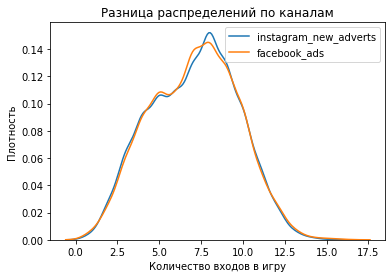

p-значение:  0.839709297490919
Не получилось отвергнуть нулевую гипотезу


instagram_new_adverts/youtube_channel_reklama



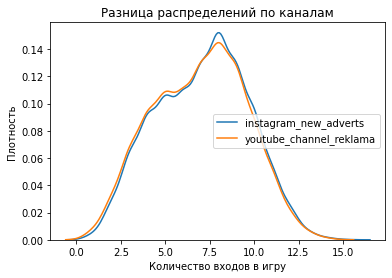

p-значение:  0.053838081304046805
Не получилось отвергнуть нулевую гипотезу


instagram_new_adverts/yandex_direct



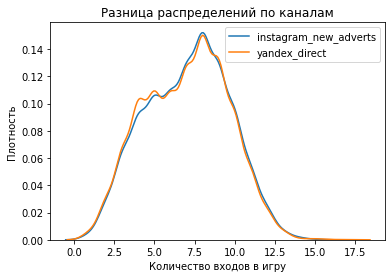

p-значение:  0.1511337370921817
Не получилось отвергнуть нулевую гипотезу


facebook_ads/youtube_channel_reklama



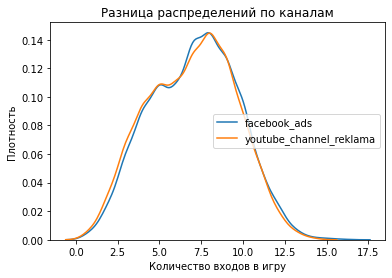

p-значение:  0.04190944456895957
Не получилось отвергнуть нулевую гипотезу


facebook_ads/yandex_direct



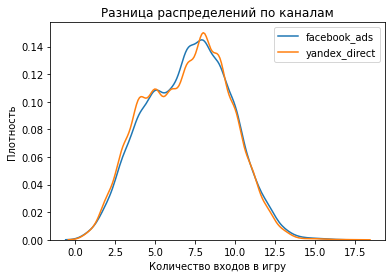

p-значение:  0.11488827662014403
Не получилось отвергнуть нулевую гипотезу


youtube_channel_reklama/yandex_direct



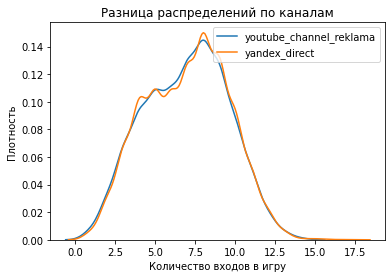

p-значение:  0.4672438210904456
Не получилось отвергнуть нулевую гипотезу




In [65]:
statistical_significance(instagram_new_adverts, facebook_ads, 'instagram_new_adverts/facebook_ads','instagram_new_adverts','facebook_ads')
statistical_significance(instagram_new_adverts,youtube_channel_reklama, 'instagram_new_adverts/youtube_channel_reklama','instagram_new_adverts','youtube_channel_reklama')
statistical_significance(instagram_new_adverts, yandex_direct, 'instagram_new_adverts/yandex_direct','instagram_new_adverts','yandex_direct')
statistical_significance(facebook_ads, youtube_channel_reklama, 'facebook_ads/youtube_channel_reklama','facebook_ads','youtube_channel_reklama')
statistical_significance(facebook_ads, yandex_direct, 'facebook_ads/yandex_direct','facebook_ads','yandex_direct')
statistical_significance(youtube_channel_reklama, yandex_direct, 'youtube_channel_reklama/yandex_direct','youtube_channel_reklama','yandex_direct')

У нас не получилось отвергнуть нулевую гепотезу, а значит что источник иторого пришел пользователь невлияент на его возвращение.

**Вывод по шагу 5:**
<p>Проверив гепотезы, мы можем сказать, что время прохождения не зависит от выбранной стратегии. 
<p>Так же стао известно, что изсточник из которого пришел игрок не влияет на его возвращение в игру.

## Формулировка выводов и рекомендации

**Выводы:**

<p>Пропуски были в столбце project_type у пользователей которые завершили уровень победой над противником. Так же кто не завершил еще уровень. так же в таблице не отображается постройки у пользователей, которые завершили победу PvP. Пропуски заполнены</p>
<p>В таблице ad_costs в столбце day и таблице game_actions в столбце event_datetime неправильный типа данных</p>
<p>Дубликаты были только в одной таблице, их удалили</p>
<p>Из всех пользователей закончили уровень только 42,8%</p>
<p>75,5% пользователей закончили уроветь через PvP</p>
<p>Самый дорогой но и самый эффективный источник рекламы это yandex_direct</p>
<p>Самый дешевый и менее эфективный youtube_channel_reklama</p>
<p>Самое долгое прохождение: 30 дней 21 час 58 минут 53 секунды</p>
<p>Самое быстрое прохождение: 09 часов 39 минут</p>
<p>Пользователей в день в среднем: 2884</p>
<p>Пользователей в неделю в среднем: 6120</p>
<p>Больше половины когорт в имеют более 50% удержания в первый день, далее идет рост от 2%-5%, с 7 числа идет резкое падение.</p>
<p>LTV растет до 19 после рост останавливается, возможно это связано с тем что на прохождение первого уровня необходимо в среднем 11 дней, что очень долго.</p>
<p><b>- Наибольшая стоимость привлечения клиента у facebook_ads - 0.78**
<p>- Наименьшая стоимость привлечения клиента у youtube_channel_reklama - 0.39
<p>- Самый выгодный источник для привлечения yandex_direct</b>
<p>Быстрее всего окупится youtube_channel_reklama за 6 месяцев, самое долгое время окупаемости facebook_ads
<p>Проверив гепотезы, мы можем сказать, что время прохождения не зависит от выбранной стратегии. 
<p>Так же стало известно, что изсточник из которого пришел игрок не влияет на его возвращение в игру.

**Рекомендации**

На основе проделанного анализа можно дать следующие рекомендации:
- Необходимо сократить время прохождения первого уровня, так как долгое прохождение и вливание в игру очень негативно сказывается на игроках. Надо сделать чтобы первые уровни игроки проходили быстрее, втягиваясь в игру полностью, а потом уже делать прохождение более длительным. 
- Самым неэффективным и дорогим источником facebook_ads, самый выгоднй источник yandex_direct, рекомендую отказать от неэффективного источника и направитьт бюджет в более эффективные источники.


Ссылка на презентацию: https://disk.yandex.ru/d/zkn4otoSjU0tGg

Дашборд набор №2: https://public.tableau.com/views/2_16526343842150/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
